# Import Library

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, label_binarize
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score
from sklearn.metrics import (
    confusion_matrix, ConfusionMatrixDisplay, precision_recall_fscore_support,
    precision_score, recall_score, f1_score, classification_report,
    mean_absolute_error
)
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.exceptions import ConvergenceWarning
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

import os
import glob

import warnings
warnings.filterwarnings("ignore", category=ConvergenceWarning)

# Setup Data

Data Source:

https://data.jakarta.go.id/dataset/indeks-standar-pencemaran-udara-ispu-tahun-2020

In [ ]:
path_dir = '/content' # Path (lokasi) datasets
os.chdir(path_dir) # Pindah ke direktori dataset
os.listdir()

['.config',
 'indeks-standar-pencemaran-udara-di-spku-tahun-2021.csv',
 'indeks-standar-pencemar-udara-di-provinsi-dki-jakarta-bulan-maret-tahun-2021.csv',
 'indeks-standar-pencemar-udara-di-provinsi-dki-jakarta-bulan-februari-tahun-2021.csv',
 'indeks-standar-pencemar-udara-di-provinsi-dki-jakarta-bulan-oktober-tahun-2021.csv',
 'indeks-standar-pencemar-udara-di-provinsi-dki-jakarta-bulan-juli-tahun-2021.csv',
 'indeks-standar-pencemar-udara-di-provinsi-dki-jakarta-bulan-januari-tahun-2021.csv',
 'indeks-standar-pencemar-udara-di-provinsi-dki-jakarta-bulan-september-tahun-2021.csv',
 'indeks-standar-pencemar-udara-di-provinsi-dki-jakarta-bulan-agustus-tahun-2021.csv',
 'indeks-standar-pencemar-udara-di-provinsi-dki-jakarta-bulan-november-tahun-2021.csv',
 'indeks-standar-pencemar-udara-di-provinsi-dki-jakarta-bulan-april-tahun-2021.csv',
 'indeks-standar-pencemar-udara-di-provinsi-dki-jakarta-bulan-desember-tahun-2021.csv',
 'indeks-standar-pencemar-udara-di-provinsi-dki-jakarta-bulan

In [ ]:
data_ispu_2021 = glob.glob('*.{}'.format('csv'))
print(data_ispu_2021)

['indeks-standar-pencemaran-udara-di-spku-tahun-2021.csv', 'indeks-standar-pencemar-udara-di-provinsi-dki-jakarta-bulan-maret-tahun-2021.csv', 'indeks-standar-pencemar-udara-di-provinsi-dki-jakarta-bulan-februari-tahun-2021.csv', 'indeks-standar-pencemar-udara-di-provinsi-dki-jakarta-bulan-oktober-tahun-2021.csv', 'indeks-standar-pencemar-udara-di-provinsi-dki-jakarta-bulan-juli-tahun-2021.csv', 'indeks-standar-pencemar-udara-di-provinsi-dki-jakarta-bulan-januari-tahun-2021.csv', 'indeks-standar-pencemar-udara-di-provinsi-dki-jakarta-bulan-september-tahun-2021.csv', 'indeks-standar-pencemar-udara-di-provinsi-dki-jakarta-bulan-agustus-tahun-2021.csv', 'indeks-standar-pencemar-udara-di-provinsi-dki-jakarta-bulan-november-tahun-2021.csv', 'indeks-standar-pencemar-udara-di-provinsi-dki-jakarta-bulan-april-tahun-2021.csv', 'indeks-standar-pencemar-udara-di-provinsi-dki-jakarta-bulan-desember-tahun-2021.csv', 'indeks-standar-pencemar-udara-di-provinsi-dki-jakarta-bulan-juni-tahun-2021.csv', 

In [ ]:
ispu_df_2021 = pd.concat([pd.read_csv(file) for file in data_ispu_2021 ], ignore_index=True)
ispu_df_2021.head()

,tanggal,pm10,pm25,so2,co,o3,no2,max,critical,categori,location,no3
0,2021-01-01,43,NaN,58,29,35,65.0,65,O3,SEDANG,DKI2,NaN
1,2021-01-01,43,NaN,58,29,35,65.0,65,O3,SEDANG,DKI2,NaN
2,2021-01-01,43,NaN,58,29,35,65.0,65,O3,SEDANG,DKI2,NaN
3,2021-01-01,43,NaN,58,29,35,65.0,65,O3,SEDANG,DKI2,NaN
4,2021-01-01,43,NaN,58,29,35,65.0,65,O3,SEDANG,DKI2,NaN


In [ ]:
ispu_df_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2555 entries, 0 to 2554
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tanggal   2555 non-null   object 
 1   pm10      2555 non-null   int64  
 2   pm25      2338 non-null   float64
 3   so2       2555 non-null   int64  
 4   co        2555 non-null   int64  
 5   o3        2555 non-null   int64  
 6   no2       2338 non-null   float64
 7   max       2555 non-null   int64  
 8   critical  2555 non-null   object 
 9   categori  2555 non-null   object 
 10  location  2555 non-null   object 
 11  no3       217 non-null    float64
dtypes: float64(3), int64(5), object(4)
memory usage: 239.7+ KB


In [ ]:
ispu_df_2021['tanggal'] = pd.to_datetime(ispu_df_2021['tanggal'], yearfirst=True)
ispu_df_2021.head()

,tanggal,pm10,pm25,so2,co,o3,no2,max,critical,categori,location,no3
0,2021-01-01,43,NaN,58,29,35,65.0,65,O3,SEDANG,DKI2,NaN
1,2021-01-01,43,NaN,58,29,35,65.0,65,O3,SEDANG,DKI2,NaN
2,2021-01-01,43,NaN,58,29,35,65.0,65,O3,SEDANG,DKI2,NaN
3,2021-01-01,43,NaN,58,29,35,65.0,65,O3,SEDANG,DKI2,NaN
4,2021-01-01,43,NaN,58,29,35,65.0,65,O3,SEDANG,DKI2,NaN


In [ ]:
ispu_df_2021_sorted = ispu_df_2021.sort_values(by = 'tanggal', ascending = True).reset_index(drop = True)
ispu_df_2021_sorted.head(5)

,tanggal,pm10,pm25,so2,co,o3,no2,max,critical,categori,location,no3
0,2021-01-01,43,NaN,58,29,35,65.0,65,O3,SEDANG,DKI2,NaN
1,2021-01-01,43,NaN,58,29,35,65.0,65,O3,SEDANG,DKI2,NaN
2,2021-01-01,43,NaN,58,29,35,65.0,65,O3,SEDANG,DKI2,NaN
3,2021-01-01,43,NaN,58,29,35,65.0,65,O3,SEDANG,DKI2,NaN
4,2021-01-01,43,NaN,58,29,35,65.0,65,O3,SEDANG,DKI2,NaN


In [ ]:
ispu_df_2021_sorted.replace('---', np.NaN, inplace=True) # Mengganti "---" menjadi NaN
ispu_df_2021_sorted.sample(10)

,tanggal,pm10,pm25,so2,co,o3,no2,max,critical,categori,location,no3
2501,2021-12-24,36,65.0,53,15,36,52.0,65,PM25,SEDANG,DKI4,NaN
1205,2021-06-22,59,84.0,54,16,38,35.0,84,PM25,SEDANG,DKI4,NaN
228,2021-02-02,53,70.0,40,14,55,25.0,70,PM25,SEDANG,DKI3,NaN
1097,2021-06-06,63,95.0,50,15,72,32.0,95,PM25,SEDANG,DKI3,NaN
433,2021-03-03,59,83.0,46,21,50,35.0,83,PM25,SEDANG,DKI3,NaN
1400,2021-07-20,86,147.0,51,15,60,24.0,147,PM25,TIDAK SEHAT,DKI4,NaN
716,2021-04-13,70,82.0,63,18,64,40.0,82,PM25,SEDANG,DKI2,NaN
145,2021-01-21,63,NaN,51,21,38,67.0,67,O3,SEDANG,DKI2,NaN
1086,2021-06-05,64,93.0,51,20,65,38.0,93,PM25,SEDANG,DKI4,NaN
1286,2021-07-03,80,141.0,54,13,44,27.0,141,PM25,TIDAK SEHAT,DKI4,NaN


In [ ]:
ispu_df_2021_sorted.to_csv('indeks-standar-pencemaran-udara-di-spku-tahun-2021.csv', index=False)

# Load Merge Data

In [ ]:
ispu_df = pd.read_csv('indeks-standar-pencemaran-udara-di-spku-tahun-2021.csv')
ispu_df.head()

,tanggal,pm10,pm25,so2,co,o3,no2,max,critical,categori,location,no3
0,2021-01-01,43,NaN,58,29,35,65.0,65,O3,SEDANG,DKI2,NaN
1,2021-01-01,43,NaN,58,29,35,65.0,65,O3,SEDANG,DKI2,NaN
2,2021-01-01,43,NaN,58,29,35,65.0,65,O3,SEDANG,DKI2,NaN
3,2021-01-01,43,NaN,58,29,35,65.0,65,O3,SEDANG,DKI2,NaN
4,2021-01-01,43,NaN,58,29,35,65.0,65,O3,SEDANG,DKI2,NaN


In [ ]:
ispu_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2555 entries, 0 to 2554
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tanggal   2555 non-null   object 
 1   pm10      2555 non-null   int64  
 2   pm25      2338 non-null   float64
 3   so2       2555 non-null   int64  
 4   co        2555 non-null   int64  
 5   o3        2555 non-null   int64  
 6   no2       2338 non-null   float64
 7   max       2555 non-null   int64  
 8   critical  2555 non-null   object 
 9   categori  2555 non-null   object 
 10  location  2555 non-null   object 
 11  no3       217 non-null    float64
dtypes: float64(3), int64(5), object(4)
memory usage: 239.7+ KB


Dataset ini berisi informasi tentang Indeks Pencemaran Udara (API), diukur dari 5 stasiun pemantauan kualitas udara (SPKU) yang terletak di Provinsi DKI Jakarta selama tahun 2020.

Penjelasan kolom-kolom dalam data ini:

- tanggal (date): Tanggal pengukuran kualitas udara.
- stasiun (station): Lokasi stasiun pengukuran.
- pm10: Particulate Matter 10 (PM10), salah satu parameter yang diukur.
- so2: Sulfur Dioxide (SO2), salah satu parameter yang diukur.
- co: Carbon Monoxide (CO), salah satu parameter yang diukur.
- o3: Ozone (O3), salah satu parameter yang diukur.
- no2: Nitrogen Dioxide (NO2), salah satu parameter yang diukur.
- max: Nilai tertinggi di antara semua parameter yang diukur pada waktu yang sama.
- critical: Parameter dengan nilai pengukuran tertinggi.
- categori: Kategori yang dihasilkan dari perhitungan Indeks Pencemaran Udara (IPU).

Kolom "categori" kemungkinan menunjukkan tingkat pencemaran berdasarkan perhitungan IPU.

Dari dataset tersebut, didapatkan informasi sebagai berikut:
1. 1830 baris data
2. 10 kolom
3. 4 kolom mempunyai tipe data 'objek,' dan 6 kolom lainya memiliki tipe data 'float'.
4. Tipe datanya float64 untuk kolom numerik dan objek untuk kolom kategorikal.
5. Missing values terdapat di 7 kolom yaitu **'pm10'**, **'so2'**, **'co'**, '**o3'**, **'no2'**, **'max'**, **'critical'**.

In [ ]:
ispu_df.describe()

,pm10,pm25,so2,co,o3,no2,max,no3
count,2555.000000,2338.000000,2555.000000,2555.000000,2555.000000,2338.000000,2555.000000,217.000000
mean,60.506849,94.694611,52.753425,15.391781,49.805479,34.098802,94.030137,34.290323
std,15.138083,24.122813,11.180667,5.851090,12.220410,16.602351,24.379959,5.274287
min,19.000000,33.000000,37.000000,7.000000,20.000000,9.000000,45.000000,26.000000
25%,53.000000,78.000000,45.000000,11.000000,41.000000,23.000000,77.000000,30.000000
50%,62.000000,94.500000,52.000000,14.000000,49.000000,31.000000,93.000000,35.000000
75%,68.000000,109.000000,55.000000,18.000000,57.000000,40.000000,108.000000,37.000000
max,179.000000,174.000000,126.000000,47.000000,151.000000,134.000000,179.000000,48.000000


In [ ]:
ispu_df.sample(10)

,tanggal,pm10,pm25,so2,co,o3,no2,max,critical,categori,location,no3
1985,2021-10-11,68,100.0,64,12,66,NaN,100,PM25,SEDANG,DKI2,30.0
1881,2021-09-26,56,98.0,50,10,54,19.0,98,PM25,SEDANG,DKI4,NaN
1817,2021-09-17,50,85.0,51,7,53,20.0,85,PM25,SEDANG,DKI4,NaN
2340,2021-12-01,63,100.0,43,13,41,30.0,100,PM25,SEDANG,DKI4,NaN
139,2021-01-20,54,NaN,45,17,33,72.0,72,O3,SEDANG,DKI2,NaN
804,2021-04-25,74,116.0,55,17,58,36.0,116,PM25,TIDAK SEHAT,DKI4,NaN
767,2021-04-20,64,94.0,52,12,55,30.0,94,PM25,SEDANG,DKI2,NaN
1871,2021-09-25,55,102.0,52,11,50,20.0,102,PM25,TIDAK SEHAT,DKI4,NaN
512,2021-03-15,55,92.0,42,18,49,34.0,92,PM25,SEDANG,DKI5,NaN
1911,2021-10-01,58,91.0,59,11,65,NaN,91,PM25,SEDANG,DKI4,38.0


# Data Preparation and Feature Engineering

## Handling Missing Values

In [ ]:
def percentageOf(value, totalValue):
    return (value / totalValue) * 100

### Identify Missing Numeric Column

In [ ]:
ispu_df.isnull().sum()

tanggal        0
pm10           0
pm25         217
so2            0
co             0
o3             0
no2          217
max            0
critical       0
categori       0
location       0
no3         2338
dtype: int64

In [ ]:
print("Total missing value: {}".format(ispu_df.isnull().values.sum()))
print("Persentase missing value: {:.2f}%".format(percentageOf(ispu_df.isnull().values.sum(), len(ispu_df))))

Total missing value: 2772
Persentase missing value: 108.49%


# Identify Skewness

In [ ]:
ispu_df.skew(numeric_only = True)

pm10    0.993138
pm25    0.288324
so2     2.202372
co      1.539696
o3      1.680238
no2     1.839963
max     0.477499
no3     0.470525
dtype: float64

- pm10: Skewness mendekati nol, sehingga menggunakan mean
- so2: Skewness positif, menunjukkan miring ke kanan, sehingga menggunakan median
- co: Skewness positif, menunjukkan miring ke kanan, sehingga menggunakan median
- o3: Skewness mendekati nol, sehingga menggunakan mean
- no2: Skewness positif, menunjukkan miring ke kanan, sehingga menggunakan median
- max: Skewness mendekati nol, sehingga menggunakan mean

# Check Outlers

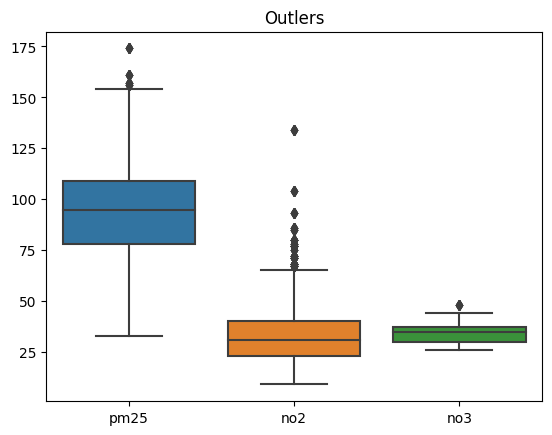

In [ ]:
numeric_cols = ispu_df.select_dtypes(include = ['float64']).columns

sns.boxplot(data=ispu_df[numeric_cols])
plt.title('Outlers')
plt.show()

### Handling Missing Numeric Columns

In [ ]:
# Mengganti missing value dengan rata-rata dari tiap kolom
ispu_df['pm10'].fillna(ispu_df['pm10'].mean(), inplace = True)
ispu_df['pm25'].fillna(ispu_df['pm25'].mean(), inplace = True)
ispu_df['so2'].fillna(ispu_df['so2'].median(), inplace = True)
ispu_df['so2'].fillna(ispu_df['so2'].median(), inplace = True)
ispu_df['co'].fillna(ispu_df['co'].median(), inplace = True)
ispu_df['o3'].fillna(ispu_df['o3'].mean(), inplace = True)
ispu_df['no2'].fillna(ispu_df['no2'].median(), inplace = True)
ispu_df['no3'].fillna(ispu_df['no3'].mean(), inplace = True)
ispu_df['max'].fillna(ispu_df['max'].mean(), inplace = True)

### Handling Missing Categorical Column Value

In [ ]:
ispu_df.isnull().sum()

tanggal     0
pm10        0
pm25        0
so2         0
co          0
o3          0
no2         0
max         0
critical    0
categori    0
location    0
no3         0
dtype: int64

In [ ]:
ispu_df['location'].unique()

array(['DKI2', 'DKI3', 'DKI5', 'DKI4', 'DKI1'], dtype=object)

In [ ]:
total_values_stasiun = ispu_df['location'].value_counts().sum()
total_values_stasiun

2555

In [ ]:
total_values_in_stasiun = ispu_df['location'].value_counts()
total_values_valid = total_values_in_stasiun.drop(['DKI2', 'DKI3', 'DKI5', 'DKI4', 'DKI1']).sum()

total_values_valid

0

In [ ]:
print("Persentase value: {:.2f}%".format(percentageOf(total_values_valid, total_values_stasiun)))

Persentase value: 0.00%


In [ ]:
ispu_df = ispu_df.loc[ispu_df['location'].isin(['DKI2', 'DKI3', 'DKI5', 'DKI4', 'DKI1'])]

ispu_df['location'].unique()

array(['DKI2', 'DKI3', 'DKI5', 'DKI4', 'DKI1'], dtype=object)

In [ ]:
# Menghapus Null Value di kolom `critical`
ispu_df.dropna(inplace=True)

In [ ]:
ispu_df.isna().sum()

tanggal     0
pm10        0
pm25        0
so2         0
co          0
o3          0
no2         0
max         0
critical    0
categori    0
location    0
no3         0
dtype: int64

In [ ]:
ispu_df.sample(5)

,tanggal,pm10,pm25,so2,co,o3,no2,max,critical,categori,location,no3
2051,2021-10-21,53,74.0,61,11,57,31.0,74,PM25,SEDANG,DKI3,32.0
1850,2021-09-22,64,119.0,54,14,48,32.0,119,PM25,TIDAK SEHAT,DKI4,35.0
2493,2021-12-23,70,99.0,57,19,44,44.0,99,PM25,SEDANG,DKI2,35.0
719,2021-04-13,70,82.0,63,18,64,40.0,82,PM25,SEDANG,DKI2,35.0
1814,2021-09-17,50,85.0,51,7,53,20.0,85,PM25,SEDANG,DKI4,35.0


## Handling Outliers

In [ ]:
def remove_outliers(dataframe, threshold=1.5, method="iqr"):
    """
    Remove outliers from a dataframe.

    Args:
        dataframe: The dataframe to be cleaned.
        threshold: The threshold to be used to identify outliers.
        method: The method to be used to identify outliers.

    Returns:
        A cleaned dataframe.
    """

    # Check if the dataframe has missing values.
    if dataframe.isnull().sum().sum() > 0:
        raise ValueError("Dataframe still has missing values")

    # Check if the method is valid.
    if method not in ["iqr", "tukey"]:
        raise ValueError("Invalid method")

    # Remove missing values.
    dataframe = dataframe.dropna()

    # Create a copy of the dataframe.
    cleaned_dataframe = dataframe.copy()

    # Get numeric columns.
    numeric_columns = dataframe.select_dtypes(include=[np.number])

    # Loop through each column in the dataframe.
    for column in numeric_columns:
        # Calculate the quartiles.
        Q1 = cleaned_dataframe[column].quantile(0.25)
        Q3 = cleaned_dataframe[column].quantile(0.75)

        # Calculate the IQR.
        IQR = Q3 - Q1

        # Calculate the upper and lower bound.
        upper_bound = Q3 + (threshold * IQR)
        lower_bound = Q1 - (threshold * IQR)

        # Identify outliers.
        outliers = cleaned_dataframe[column].loc[(cleaned_dataframe[column] < lower_bound) | (cleaned_dataframe[column] > upper_bound)]

        # Drop outliers.
        cleaned_dataframe = cleaned_dataframe.drop(outliers.index)

    # Reset the index.
    cleaned_dataframe = cleaned_dataframe.reset_index(drop=True)

    return cleaned_dataframe

In [ ]:
ispu_df = remove_outliers(ispu_df)

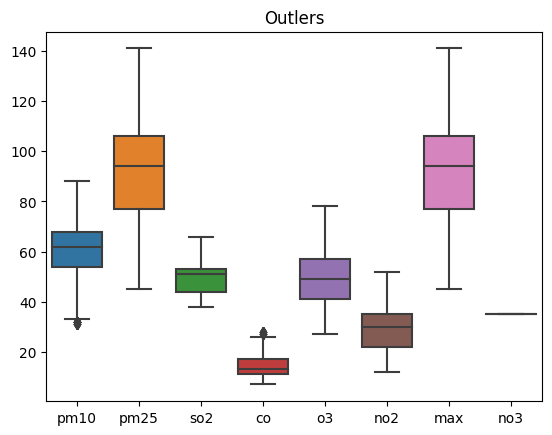

In [ ]:
sns.boxplot(data=ispu_df)
plt.title('Outlers')
plt.show()

In [ ]:
ispu_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1939 entries, 0 to 1938
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tanggal   1939 non-null   object 
 1   pm10      1939 non-null   int64  
 2   pm25      1939 non-null   float64
 3   so2       1939 non-null   int64  
 4   co        1939 non-null   int64  
 5   o3        1939 non-null   int64  
 6   no2       1939 non-null   float64
 7   max       1939 non-null   int64  
 8   critical  1939 non-null   object 
 9   categori  1939 non-null   object 
 10  location  1939 non-null   object 
 11  no3       1939 non-null   float64
dtypes: float64(3), int64(5), object(4)
memory usage: 181.9+ KB


## Encoding

### OrdinalEncoder

In [ ]:
unique_values_categori = ispu_df['categori'].unique()
unique_values_categori

array(['TIDAK SEHAT', 'SEDANG', 'BAIK'], dtype=object)

In [ ]:
ordinal_encoder = OrdinalEncoder(categories=[['TIDAK SEHAT', 'SEDANG', 'BAIK']])
ordinal_encoder

OrdinalEncoder(categories=[['TIDAK SEHAT', 'SEDANG', 'BAIK']])

In [ ]:
# Transformasi kolom 'categori' menjadi nilai numerik
ispu_df['categori_encoded'] = ordinal_encoder.fit_transform(ispu_df[['categori']])
ispu_df['categori_encoded'].sample(10)

1679    1.0
1640    1.0
1125    1.0
1157    0.0
137     0.0
1078    0.0
1595    1.0
1806    1.0
1257    0.0
1579    1.0
Name: categori_encoded, dtype: float64

### OneHotEncoder

In [ ]:
unique_values_location = ispu_df['location'].unique()
unique_values_location

array(['DKI5', 'DKI3', 'DKI2', 'DKI4', 'DKI1'], dtype=object)

In [ ]:
onehot_encoder = OneHotEncoder(sparse_output=False)
onehot_encoder

OneHotEncoder(sparse_output=False)

In [ ]:
onehot_encoder.fit(ispu_df[["location"]])

OneHotEncoder(sparse_output=False)

In [ ]:
onehot_columns_location = pd.DataFrame(
    onehot_encoder.transform(ispu_df[["location"]]),
    columns=onehot_encoder.get_feature_names_out()
)
onehot_columns_location

,location_DKI1,location_DKI2,location_DKI3,location_DKI4,location_DKI5
0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...
1934,0.0,0.0,0.0,1.0,0.0
1935,0.0,0.0,0.0,1.0,0.0
1936,0.0,0.0,0.0,1.0,0.0
1937,0.0,0.0,0.0,1.0,0.0


In [ ]:
onehot_encoder.fit(ispu_df[["critical"]])

OneHotEncoder(sparse_output=False)

In [ ]:
onehot_columns_critical = pd.DataFrame(
    onehot_encoder.transform(ispu_df[["critical"]]),
    columns=onehot_encoder.get_feature_names_out()
)
onehot_columns_critical

,critical_O3,critical_PM10,critical_PM25,critical_PM26
0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0
3,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0
...,...,...,...,...
1934,0.0,0.0,1.0,0.0
1935,0.0,0.0,1.0,0.0
1936,0.0,0.0,1.0,0.0
1937,0.0,0.0,1.0,0.0


In [ ]:
ispu_df = pd.concat(
    [
        ispu_df.reset_index(drop=True),
        onehot_columns_location,
        onehot_columns_critical,
    ],
    axis=1
)
ispu_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1939 entries, 0 to 1938
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   tanggal           1939 non-null   object 
 1   pm10              1939 non-null   int64  
 2   pm25              1939 non-null   float64
 3   so2               1939 non-null   int64  
 4   co                1939 non-null   int64  
 5   o3                1939 non-null   int64  
 6   no2               1939 non-null   float64
 7   max               1939 non-null   int64  
 8   critical          1939 non-null   object 
 9   categori          1939 non-null   object 
 10  location          1939 non-null   object 
 11  no3               1939 non-null   float64
 12  categori_encoded  1939 non-null   float64
 13  location_DKI1     1939 non-null   float64
 14  location_DKI2     1939 non-null   float64
 15  location_DKI3     1939 non-null   float64
 16  location_DKI4     1939 non-null   float64


In [ ]:
# Menghapus kolom asli setelah menggunakan OneHotEncoder
ispu_df.drop(columns=['tanggal', 'location', 'critical'], inplace=True)

ispu_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1939 entries, 0 to 1938
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   pm10              1939 non-null   int64  
 1   pm25              1939 non-null   float64
 2   so2               1939 non-null   int64  
 3   co                1939 non-null   int64  
 4   o3                1939 non-null   int64  
 5   no2               1939 non-null   float64
 6   max               1939 non-null   int64  
 7   categori          1939 non-null   object 
 8   no3               1939 non-null   float64
 9   categori_encoded  1939 non-null   float64
 10  location_DKI1     1939 non-null   float64
 11  location_DKI2     1939 non-null   float64
 12  location_DKI3     1939 non-null   float64
 13  location_DKI4     1939 non-null   float64
 14  location_DKI5     1939 non-null   float64
 15  critical_O3       1939 non-null   float64
 16  critical_PM10     1939 non-null   float64


## Numerical Data Transform

### StandardScaller

In [ ]:
std_scaler = StandardScaler()

In [ ]:
ispu_df.columns

Index(['pm10', 'pm25', 'so2', 'co', 'o3', 'no2', 'max', 'categori', 'no3',
       'categori_encoded', 'location_DKI1', 'location_DKI2', 'location_DKI3',
       'location_DKI4', 'location_DKI5', 'critical_O3', 'critical_PM10',
       'critical_PM25', 'critical_PM26'],
      dtype='object')

In [ ]:
std_scaler.fit(ispu_df[["pm10", "so2", "co", "o3", "no2", "max"]])

StandardScaler()

In [ ]:
std_scaler.mean_, std_scaler.scale_

(array([60.44043321, 49.47292419, 14.19855596, 49.55956679, 29.51624549,
        93.12274368]),
 array([11.62784333,  5.80459389,  4.16192099, 10.74016503,  8.80744206,
        21.02395288]))

In [ ]:
std_scaler.transform(ispu_df[["pm10", "so2", "co", "o3", "no2", "max"]]).shape

(1939, 6)

In [ ]:
ispu_df = pd.concat(
    [
        ispu_df.reset_index(drop=True),
        pd.DataFrame(
            std_scaler.transform(ispu_df[["pm10", "so2", "co", "o3", "no2", "max"]]),
            columns=["scaled_pm10", "scaled_so2", "scaled_co", "scaled_o3", "scaled_no2", "scaled_max"]
        )
    ],
    axis=1
)

ispu_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1939 entries, 0 to 1938
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   pm10              1939 non-null   int64  
 1   pm25              1939 non-null   float64
 2   so2               1939 non-null   int64  
 3   co                1939 non-null   int64  
 4   o3                1939 non-null   int64  
 5   no2               1939 non-null   float64
 6   max               1939 non-null   int64  
 7   categori          1939 non-null   object 
 8   no3               1939 non-null   float64
 9   categori_encoded  1939 non-null   float64
 10  location_DKI1     1939 non-null   float64
 11  location_DKI2     1939 non-null   float64
 12  location_DKI3     1939 non-null   float64
 13  location_DKI4     1939 non-null   float64
 14  location_DKI5     1939 non-null   float64
 15  critical_O3       1939 non-null   float64
 16  critical_PM10     1939 non-null   float64


In [ ]:
ispu_df.drop(columns=["pm10", "so2", "co", "o3", "no2", "max"], inplace=True)

In [ ]:
ispu_df.columns

Index(['pm25', 'categori', 'no3', 'categori_encoded', 'location_DKI1',
       'location_DKI2', 'location_DKI3', 'location_DKI4', 'location_DKI5',
       'critical_O3', 'critical_PM10', 'critical_PM25', 'critical_PM26',
       'scaled_pm10', 'scaled_so2', 'scaled_co', 'scaled_o3', 'scaled_no2',
       'scaled_max'],
      dtype='object')

In [ ]:
ispu_df.sample(10)

,pm25,categori,no3,categori_encoded,location_DKI1,location_DKI2,location_DKI3,location_DKI4,location_DKI5,critical_O3,critical_PM10,critical_PM25,critical_PM26,scaled_pm10,scaled_so2,scaled_co,scaled_o3,scaled_no2,scaled_max
135,103.0,TIDAK SEHAT,35.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.650126,-1.287416,1.874482,-0.796968,1.190329,0.469810
1384,86.0,SEDANG,35.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,-0.037877,0.263081,-0.768529,-2.100486,-0.626316,-0.338792
689,92.0,SEDANG,35.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,-0.553880,0.090803,-1.249076,0.227225,-1.534639,-0.053403
1528,71.0,SEDANG,35.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.983883,-0.081474,-1.008802,-0.052100,-0.172155,-1.052264
1920,89.0,SEDANG,35.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,-0.123878,0.607635,0.432840,-1.448727,0.395547,-0.196097
469,81.0,SEDANG,35.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.392125,0.952190,0.432840,1.437635,0.282006,-0.576616
1498,109.0,TIDAK SEHAT,35.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,-0.295879,0.607635,-1.489350,-0.238317,-0.399236,0.755198
583,91.0,SEDANG,35.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.908128,1.296745,0.913387,0.506550,1.417410,-0.100968
1600,95.0,SEDANG,35.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.220124,0.435358,0.673113,1.251418,1.985111,0.089291
875,103.0,TIDAK SEHAT,35.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.736127,0.607635,-0.287981,0.785876,-0.399236,0.469810


In [ ]:
ispu_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1939 entries, 0 to 1938
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   pm25              1939 non-null   float64
 1   categori          1939 non-null   object 
 2   no3               1939 non-null   float64
 3   categori_encoded  1939 non-null   float64
 4   location_DKI1     1939 non-null   float64
 5   location_DKI2     1939 non-null   float64
 6   location_DKI3     1939 non-null   float64
 7   location_DKI4     1939 non-null   float64
 8   location_DKI5     1939 non-null   float64
 9   critical_O3       1939 non-null   float64
 10  critical_PM10     1939 non-null   float64
 11  critical_PM25     1939 non-null   float64
 12  critical_PM26     1939 non-null   float64
 13  scaled_pm10       1939 non-null   float64
 14  scaled_so2        1939 non-null   float64
 15  scaled_co         1939 non-null   float64
 16  scaled_o3         1939 non-null   float64


In [ ]:
# Pisahkan kolom 'categori' sebagai variabel dependen (y)
y = ispu_df['categori_encoded']

# Pisahkan fitur-fitur yang akan digunakan sebagai variabel independen (X)
X = ispu_df.drop(columns=['categori', 'categori_encoded'])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Show the Training and Testing Data
print('Shape of training feature:', X_train.shape)
print('Shape of testing feature:', X_test.shape)
print('Shape of training label:', y_train.shape)
print('Shape of training label:', y_test.shape)

Shape of training feature: (1551, 17)
Shape of testing feature: (388, 17)
Shape of training label: (1551,)
Shape of training label: (388,)


In [ ]:
X_train.columns

Index(['pm25', 'no3', 'location_DKI1', 'location_DKI2', 'location_DKI3',
       'location_DKI4', 'location_DKI5', 'critical_O3', 'critical_PM10',
       'critical_PM25', 'critical_PM26', 'scaled_pm10', 'scaled_so2',
       'scaled_co', 'scaled_o3', 'scaled_no2', 'scaled_max'],
      dtype='object')

In [ ]:
y_train.value_counts()

1.0    939
0.0    606
2.0      6
Name: categori_encoded, dtype: int64

# Modeling

## Supervised Learning

 ### Logistic Regression

In [ ]:
lr_params = {'C': [0.1, 1, 10], 'penalty': ['l2'], 'solver': ['lbfgs', 'liblinear', 'sag'], 'max_iter': [100, 200, 300]}
model = LogisticRegression()
lr_grid = GridSearchCV(estimator=model, param_grid=lr_params, cv=5, scoring='accuracy')
lr_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.1, 1, 10], 'max_iter': [100, 200, 300],
                         'penalty': ['l2'],
                         'solver': ['lbfgs', 'liblinear', 'sag']},
             scoring='accuracy')

In [ ]:
lr_best_model = lr_grid.best_estimator_

In [ ]:
# Memprediksi target (kelas) pada set pelatihan dan set pengujian
y_train_pred = lr_best_model.predict(X_train)
y_test_pred = lr_best_model.predict(X_test)

# Mengukur akurasi pada set pelatihan dan set pengujian
accuracy_train = accuracy_score(y_train, y_train_pred) * 100
accuracy_lr = accuracy_score(y_test, y_test_pred) * 100

# Menghasilkan Confusion Matrix dan Classification Report pada set pelatihan
conf_matrix_train = confusion_matrix(y_train, y_train_pred)
class_report_train = classification_report(y_train, y_train_pred)

# Menghasilkan Confusion Matrix dan Classification Report pada set pengujian
conf_matrix_test = confusion_matrix(y_test, y_test_pred)
class_report_test = classification_report(y_test, y_test_pred)

# Menampilkan hasil akurasi
print(f"Akurasi Train: {accuracy_train:.2f}%")
print(f"Akurasi Test: {accuracy_lr:.2f}%")

# Menampilkan hasil Confusion Matrix dan Classification Report
print("\nConfusion Matrix (Train):\n", conf_matrix_train)
print("\nClassification Report (Train):\n", class_report_train)

print("\nConfusion Matrix (Test):\n", conf_matrix_test)
print("\nClassification Report (Test):\n", class_report_test)

Akurasi Train: 100.00%
Akurasi Test: 100.00%

Confusion Matrix (Train):
 [[606   0   0]
 [  0 939   0]
 [  0   0   6]]

Classification Report (Train):
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       606
         1.0       1.00      1.00      1.00       939
         2.0       1.00      1.00      1.00         6

    accuracy                           1.00      1551
   macro avg       1.00      1.00      1.00      1551
weighted avg       1.00      1.00      1.00      1551


Confusion Matrix (Test):
 [[150   0   0]
 [  0 237   0]
 [  0   0   1]]

Classification Report (Test):
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       150
         1.0       1.00      1.00      1.00       237
         2.0       1.00      1.00      1.00         1

    accuracy                           1.00       388
   macro avg       1.00      1.00      1.00       388
weighted avg       1.00      1.00   

([<matplotlib.axis.YTick at 0x799a525c6b90>,
 [Text(0, 0, 'TIDAK SEHAT'), Text(0, 1, 'SEDANG'), Text(0, 2, 'BAIK')])

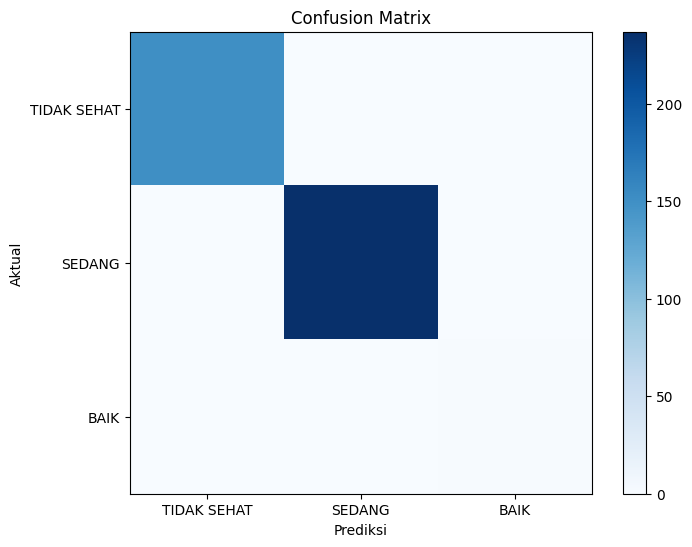

In [ ]:
# Membuat Confusion Matrix
conf_matrix_test = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix_test, cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.xticks([0, 1, 2], ['TIDAK SEHAT', 'SEDANG', 'BAIK'])
plt.yticks([0, 1, 2], ['TIDAK SEHAT', 'SEDANG', 'BAIK'])

In [ ]:
# Membuat DataFrame yang berisi data asli dan hasil prediksi
hasil_prediksi_lr_df = pd.DataFrame({'Data Asli': y_test, 'Hasil Prediksi': y_test_pred})
hasil_prediksi_lr_df.head()

,Data Asli,Hasil Prediksi
1603,1.0,1.0
1269,0.0,0.0
70,1.0,1.0
1893,1.0,1.0
1050,0.0,0.0


### Random Forest Classification

In [ ]:
rf_params = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20], 'min_samples_split': [2, 5, 10]}
rf_model = RandomForestClassifier(random_state=42)
rf_grid = GridSearchCV(rf_model, rf_params, cv=3, scoring='accuracy')
rf_grid.fit(X_train, y_train)
rf_best_model = rf_grid.best_estimator_

In [ ]:
y_pred_rf = rf_best_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf) * 100

In [ ]:
# Membuat DataFrame yang berisi data asli dan hasil prediksi
hasil_prediksi_rf_df = pd.DataFrame({'Data Asli': y_test, 'Hasil Prediksi': y_pred_rf})
hasil_prediksi_rf_df.head()

,Data Asli,Hasil Prediksi
1603,1.0,1.0
1269,0.0,0.0
70,1.0,1.0
1893,1.0,1.0
1050,0.0,0.0


### Support Vector Classifier (SVC)

In [ ]:
svc_params = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf', 'poly']}
svc_model = SVC()
svc_grid = GridSearchCV(svc_model, svc_params, cv=3, scoring='accuracy')
svc_grid.fit(X_train, y_train)
svc_best_model = svc_grid.best_estimator_

In [ ]:
y_pred_svc = svc_best_model.predict(X_test)
accuracy_svc = accuracy_score(y_test, y_pred_svc) * 100

In [ ]:
# Membuat DataFrame yang berisi data asli dan hasil prediksi
hasil_prediksi_svc_df = pd.DataFrame({'Data Asli': y_test, 'Hasil Prediksi': y_pred_svc})
hasil_prediksi_svc_df.head()

,Data Asli,Hasil Prediksi
1603,1.0,1.0
1269,0.0,0.0
70,1.0,1.0
1893,1.0,1.0
1050,0.0,0.0


## Unsupervised Learning

In [ ]:
ispu_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1939 entries, 0 to 1938
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   pm25              1939 non-null   float64
 1   categori          1939 non-null   object 
 2   no3               1939 non-null   float64
 3   categori_encoded  1939 non-null   float64
 4   location_DKI1     1939 non-null   float64
 5   location_DKI2     1939 non-null   float64
 6   location_DKI3     1939 non-null   float64
 7   location_DKI4     1939 non-null   float64
 8   location_DKI5     1939 non-null   float64
 9   critical_O3       1939 non-null   float64
 10  critical_PM10     1939 non-null   float64
 11  critical_PM25     1939 non-null   float64
 12  critical_PM26     1939 non-null   float64
 13  scaled_pm10       1939 non-null   float64
 14  scaled_so2        1939 non-null   float64
 15  scaled_co         1939 non-null   float64
 16  scaled_o3         1939 non-null   float64


In [ ]:
pm10 = ispu_df['scaled_pm10']
o3 = ispu_df['scaled_o3']

In [ ]:
scaled_data = pd.concat([pm10, o3], axis=1)
scaled_data.head()

,scaled_pm10,scaled_o3
0,1.080129,-0.331426
1,1.080129,-0.331426
2,1.080129,-0.331426
3,1.080129,-0.331426
4,1.080129,-0.331426


### K-Means

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


(k=3) average_silhouette_score = 0.3987342885125542


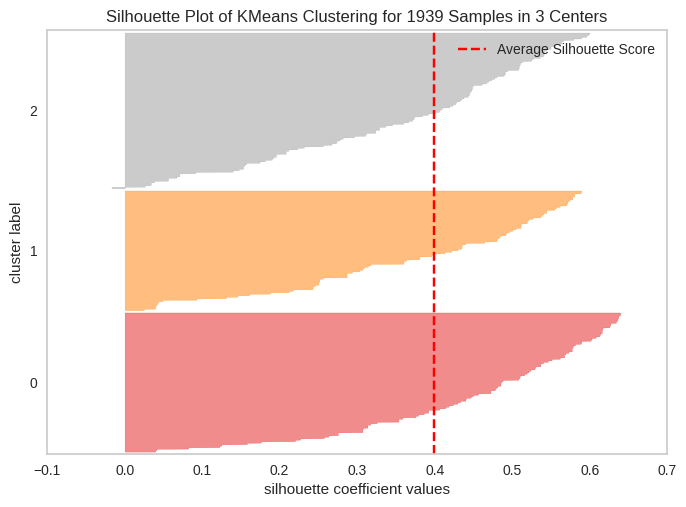


(k=4) average_silhouette_score = 0.46031265836920454


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


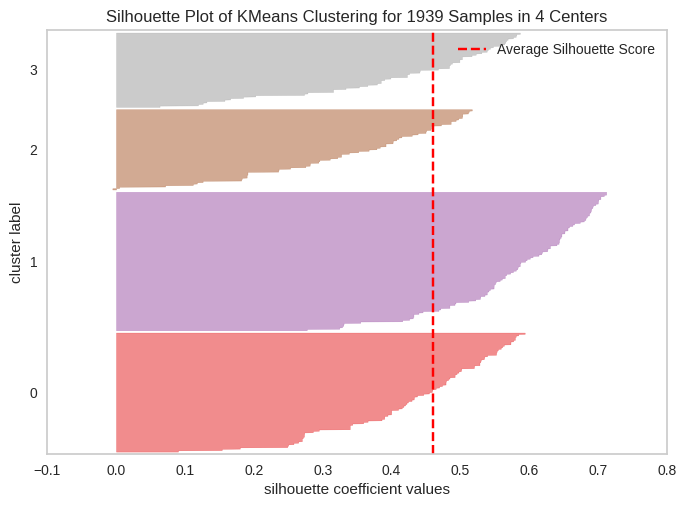


(k=5) average_silhouette_score = 0.5179028331312091


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


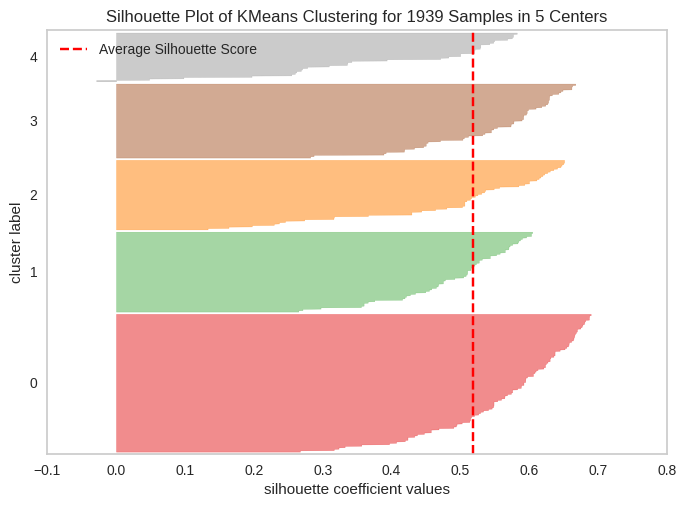

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer

# Jumlah cluster yang ingin dicoba
n_clusters_to_try = [3, 4, 5]

for n_clusters in n_clusters_to_try:
    # Menerapkan k-Means Clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans_clusters = kmeans.fit_predict(scaled_data)
    labels = kmeans.predict(scaled_data)

    # Menghitung Silhouette Score
    average_silhouette_score = silhouette_score(scaled_data, labels)

    # Menampilkan hasil Silhouette Score
    print(f"(k={n_clusters}) {average_silhouette_score = }")

    # Visualisasi Silhouette Score
    silhouette_viz = SilhouetteVisualizer(kmeans)
    silhouette_viz.fit(scaled_data)
    plt.grid(False)
    silhouette_viz.show()
    plt.show()

    print()

    # Menambahkan hasil clustering ke dataframe
    scaled_data[f'k-Means Cluster {n_clusters}'] = kmeans_clusters

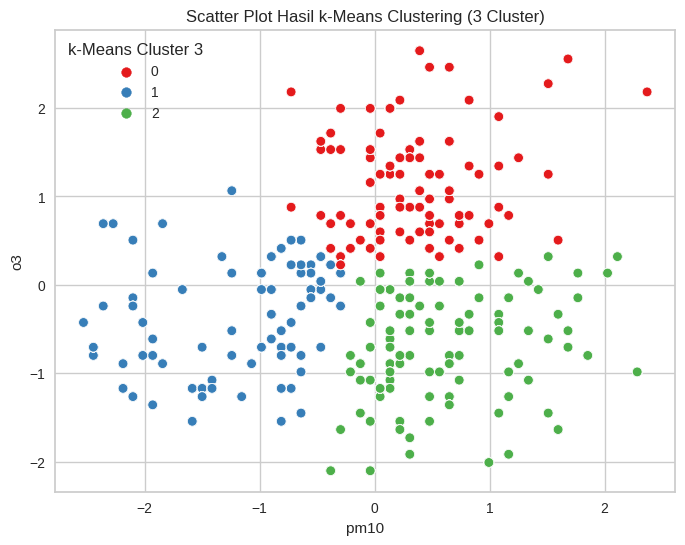

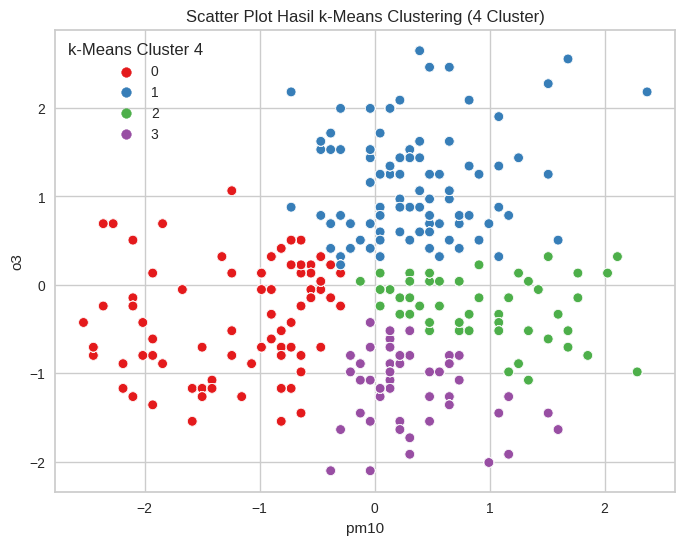

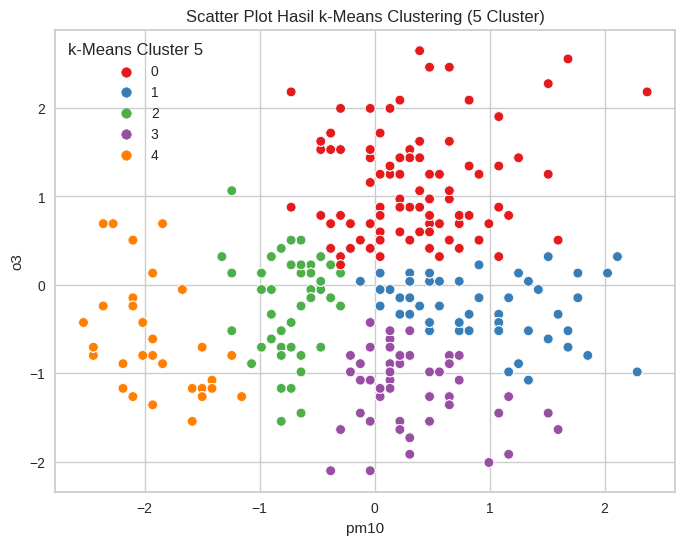

In [ ]:
# Jumlah cluster yang ingin ditampilkan
n_clusters_to_show = [3, 4, 5]

for n_clusters in n_clusters_to_show:
    # Scatter plot untuk hasil k-Means Clustering
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x="scaled_pm10", y="scaled_o3", hue=f"k-Means Cluster {n_clusters}", data=scaled_data, palette="Set1")

    # Memberi judul dan label
    plt.title(f'Scatter Plot Hasil k-Means Clustering ({n_clusters} Cluster)')
    plt.xlabel('pm10')
    plt.ylabel('o3')

    plt.show()

### DBSCAN

In [ ]:
from sklearn.cluster import DBSCAN

# Menerapkan DBSCAN Clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_clusters = dbscan.fit_predict(scaled_data)

# Menambahkan hasil clustering ke dataframe
scaled_data['DBSCAN Cluster'] = dbscan_clusters

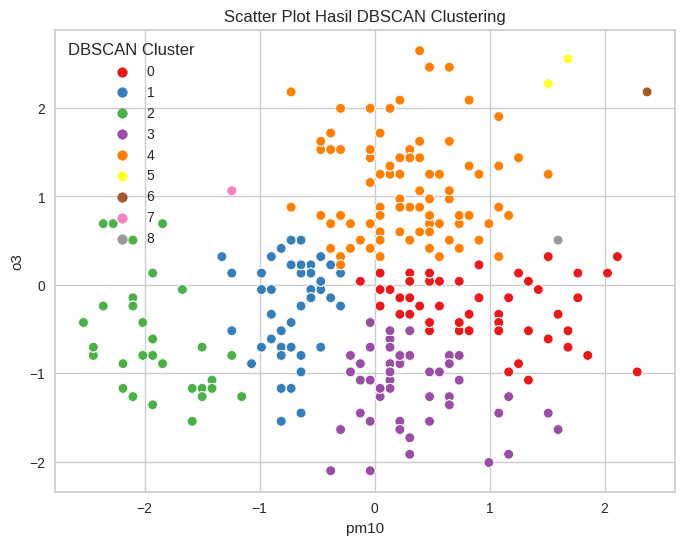

In [ ]:
# Scatter plot untuk hasil DBSCAN Clustering
plt.figure(figsize=(8, 6))
sns.scatterplot(x='scaled_pm10', y='scaled_o3', hue='DBSCAN Cluster', data=scaled_data, palette='Set1')

# Memberi judul dan label
plt.title('Scatter Plot Hasil DBSCAN Clustering')
plt.xlabel('pm10')
plt.ylabel('o3')

plt.show()

# Evaluation Model

In [ ]:
hasil_prediksi_lr_df.head()
hasil_prediksi_rf_df.head()
hasil_prediksi_svc_df.head()

,Data Asli,Hasil Prediksi
1603,1.0,1.0
1269,0.0,0.0
70,1.0,1.0
1893,1.0,1.0
1050,0.0,0.0


In [ ]:
target_lr = hasil_prediksi_lr_df['Data Asli'].values.astype('int64')
prediction_lr = hasil_prediksi_lr_df['Hasil Prediksi'].values.astype('int64')

print("target_lr:\n", target_lr[:10])
print("prediction_lr:\n", prediction_lr[:10])

target_rf = hasil_prediksi_rf_df['Data Asli'].values.astype('int64')
prediction_rf = hasil_prediksi_rf_df['Hasil Prediksi'].values.astype('int64')

print("target_rf:\n", target_rf[:10])
print("prediction_rf:\n", prediction_rf[:10])

target_svc = hasil_prediksi_svc_df['Data Asli'].values.astype('int64')
prediction_svc = hasil_prediksi_svc_df['Hasil Prediksi'].values.astype('int64')

print("target_svc:\n", target_svc[:10])
print("prediction_svc:\n", prediction_svc[:10])

target_lr:
 [1 0 1 1 0 0 1 1 0 0]
prediction_lr:
 [1 0 1 1 0 0 1 1 0 0]
target_rf:
 [1 0 1 1 0 0 1 1 0 0]
prediction_rf:
 [1 0 1 1 0 0 1 1 0 0]
target_svc:
 [1 0 1 1 0 0 1 1 0 0]
prediction_svc:
 [1 0 1 1 0 0 1 1 0 0]


In [ ]:
cm_lr = confusion_matrix(target_lr, prediction_lr, labels=[1, 0])
cm_rf = confusion_matrix(target_rf, prediction_rf, labels=[1, 0])


Dari hasil prediksi tersebut, diperoleh confusion matrix sebagai berikut.

| | Predited `True` | Predicted `False` |
|---|---|---|
| Actual `True` | 191 | 0 |
| Actual `False` | 13 | 2 |

In [ ]:
true_pos = cm_lr[0, 0]
true_neg = cm_lr[1, 1]
false_pos = cm_lr[1, 0]
false_neg = cm_lr[0, 1]

print("TP:", true_pos)
print("TN:", true_neg)
print("FP:", false_pos)
print("FN:", false_neg)

TP: 237
TN: 150
FP: 0
FN: 0


In [ ]:
precision = true_pos / (true_pos + false_pos)

print(f"Precision LR: {precision} (sklearn: {precision_score(target_lr, prediction_lr, average=None)})")

Precision LR: 1.0 (sklearn: [1. 1. 1.])


In [ ]:
recall = true_pos / (true_pos + false_neg)

print(f"recall: {recall} (sklearn: {recall_score(target_lr, prediction_lr, average=None)})")

recall: 1.0 (sklearn: [1. 1. 1.])


In [ ]:
metrics = precision_recall_fscore_support(target_lr, prediction_lr, labels=[1, 0], average=None)
print("Precision:", metrics[0])
print("Recall:", metrics[1])
print("F1-score:", metrics[2])

Precision: [1. 1.]
Recall: [1. 1.]
F1-score: [1. 1.]


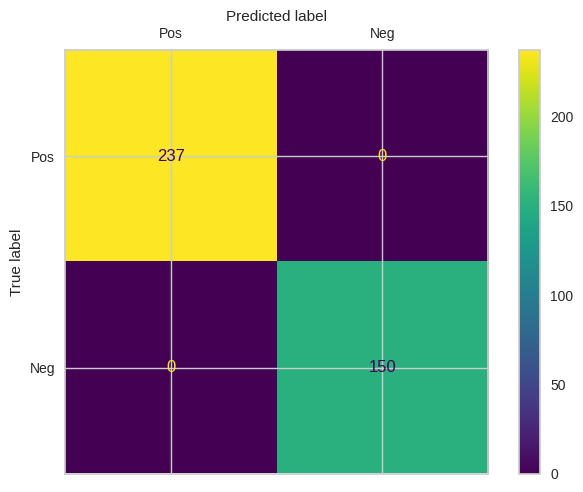

In [ ]:
cm_display = ConfusionMatrixDisplay.from_predictions(target_lr, prediction_lr, labels=[1, 0], display_labels=["Pos", "Neg"])
cm_display.ax_.xaxis.set_label_position("top")
plt.tick_params(top=True, labeltop=True, bottom=False, labelbottom=False)
plt.show()

In [ ]:
print("\nClassification Report:\n", classification_report(target_lr, prediction_lr, labels=[1, 0], target_names=["pos", "neg"]))


Classification Report:
               precision    recall  f1-score   support

         pos       1.00      1.00      1.00       237
         neg       1.00      1.00      1.00       150

   micro avg       1.00      1.00      1.00       387
   macro avg       1.00      1.00      1.00       387
weighted avg       1.00      1.00      1.00       387



In [ ]:
# Tampilkan hasil akurasi terbaik
print(f"Logistic Regression Accuracy: {accuracy_lr:.2f}%")
print(f"Random Forest Accuracy: {accuracy_rf:.2f}%")
print(f"SVC Accuracy: {accuracy_svc:.2f}%")

Logistic Regression Accuracy: 100.00%
Random Forest Accuracy: 100.00%
SVC Accuracy: 100.00%
